## Online Retail Data - Project 2018
### 1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

# Online Retail Data Set 

Dataset from UCI - Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/Online+Retail

This Dataset was selected as it fit the criteria of the project: 
- It had more than 4 variables. 
- It has over 100 datapoints (The initial dataset before cleaning had 65,535 rows.)
- There was a date column 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.





In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read excel, using xls as it reads in faster
df = pd.read_excel("Online-Retail.xls")
# investigate the shape
df.shape

(65535, 8)

In [3]:
# a look at the first 10 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Let's look at the summary statistics

Looking at the summary statistics we can quickly see some issues. 
- Quantity has negative values
- Unit price has values of zero. 

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


### Cleaning the data

- Check for missing values and removing those rows.
- Check for negative values
- Check for duplicates
- Check for Unit Price equals to 0

#### Finding missing Values and removing them
Using isnull() we can quickly see where the null values are

In [5]:
# check for null values
# There are null values in Customer ID and Description
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      166
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     25317
Country            0
dtype: int64

Removing rows with missing values/null values, any negative quanitities, unit price less than than 1.

In [6]:
df = df[df.CustomerID.notnull() & (df.Quantity > 0) & (df.UnitPrice > 0)]
# drop rows with missing value
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Removing Duplicates

In [7]:
# This will remove duplicates
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


After cleaning the data, the row count has dropped to 39,184.
We can see from the descriptive statistics that there are no quantities less than 1 or Unit Price equal to 0.

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,39184.000000,39184.000000,39184.000000
mean,14.616246,3.127486,15393.779527
std,378.059152,5.251979,1769.074797
min,1.000000,0.070000,12346.000000
25%,2.000000,1.250000,14030.000000
50%,5.000000,1.950000,15373.000000
75%,12.000000,3.750000,17059.000000
max,74215.000000,295.000000,18283.000000


### 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

Questions:

1. Which country has the most market share? no.of customers, most quantity sold, largest total cost - done
2. Customer with the most purchases
3. Customer who spent the most and their location
4. When were the most items sold? 


### Exploratory Data Analysis

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### How many countries?

This variable is Nominal variable as there is more than two variables. There are 22 countries in total.

In [10]:
#number of countries in the dataset
myArray = np.unique(df['Country'])
len(myArray)

22

In [11]:
# Show me the unique country varibales
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.unique.html
np.unique(df['Country'])

array(['Australia', 'Austria', 'Belgium', 'Channel Islands', 'Cyprus',
       'Denmark', 'EIRE', 'Finland', 'France', 'Germany', 'Iceland',
       'Italy', 'Japan', 'Lithuania', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

A Large proportion of the customers are form the UK.

In [12]:
mostpopular=df[['Country','CustomerID']]
mostpopular.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
21,United Kingdom,35085
8,France,957
9,Germany,909
6,EIRE,418
18,Spain,353
17,Portugal,204
14,Netherlands,186
20,Switzerland,175
15,Norway,147
0,Australia,139


In [13]:
mostpopular=df[['Country','Quantity']]
mostpopular.groupby(['Country'])['Quantity'].aggregate('count').reset_index().sort_values('Quantity', ascending=False)

,Country,Quantity
21,United Kingdom,35085
8,France,957
9,Germany,909
6,EIRE,418
18,Spain,353
17,Portugal,204
14,Netherlands,186
20,Switzerland,175
15,Norway,147
0,Australia,139


In [14]:
mostpopular=df[['CustomerID','Quantity']].drop_duplicates()
mostpopular.groupby(['CustomerID'])['Quantity'].aggregate('count').reset_index().sort_values('Quantity', ascending=False)

,CustomerID,Quantity
504,15061.0,37
422,14646.0,29
937,17340.0,28
582,15498.0,26
90,12748.0,25
549,15311.0,25
477,14911.0,23
425,14667.0,23
255,13694.0,23
972,17511.0,23


### A look at the InvoiceDate column

This variable is a timeseries and the data is taken over a period of two months, December 2010 to January 2011

In [41]:
# add a new column for date 
# convert date column to date time + add new column
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# create a new column for month
df['Month'] = df['Date'].dt.strftime('%b %Y')

# create a new column for month
df['Day'] = df['Date'].dt.strftime('%D')
df['Day'] = pd.to_datetime(df['Day'])

#investigating the time series of the data
df['Month'].unique()

array(['Dec 2010', 'Jan 2011'], dtype=object)

### What country had the biggest sales?

In [42]:
# What is the Total Cost 
df['Total Cost'] =  df['UnitPrice'] * df['Quantity']
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Total Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,2010-12-01,20.34


The United Kingdom had the highest sales from the of 22 countries.

In [43]:
totalcost = df.groupby('Country', as_index=False).agg({"Total Cost": "sum"}).sort_values(
    'Total Cost', ascending=False)
totalcost.head(10)

,Country,Total Cost
21,United Kingdom,822229.46
6,EIRE,29069.02
14,Netherlands,27200.86
9,Germany,23094.40
8,France,21943.93
18,Spain,10056.52
0,Australia,9665.88
12,Japan,7705.07
17,Portugal,5811.75
20,Switzerland,4909.55


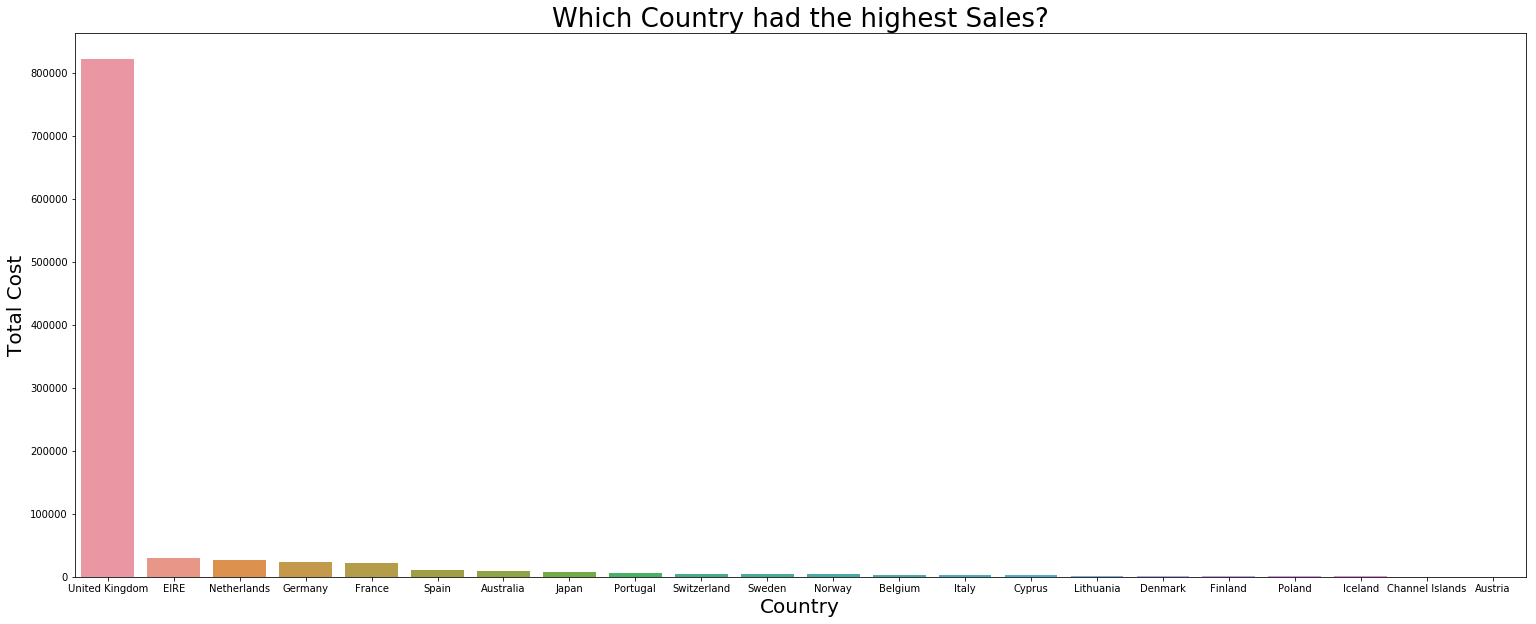

In [44]:
%matplotlib inline
plt.figure(figsize=(26, 10))
plot =sns.barplot(x='Country',y='Total Cost', data=totalcost)

plot.set_title('Which Country had the highest Sales?',fontsize=26)
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('Total Cost',fontsize=20)
plot

In [45]:
detailed = df.groupby('Country', as_index=False).agg(
    {"Total Cost": "sum", "Quantity":"sum", "CustomerID":"count"}).sort_values(
    'Quantity', ascending=False)
detailed.head(10)

,Country,Total Cost,Quantity,CustomerID
21,United Kingdom,822229.46,479305,35085
14,Netherlands,27200.86,21381,186
6,EIRE,29069.02,13145,418
8,France,21943.93,11580,957
9,Germany,23094.40,11435,909
0,Australia,9665.88,6001,139
19,Sweden,4381.86,4247,39
12,Japan,7705.07,4093,65
18,Spain,10056.52,3965,353
15,Norway,3787.12,3582,147


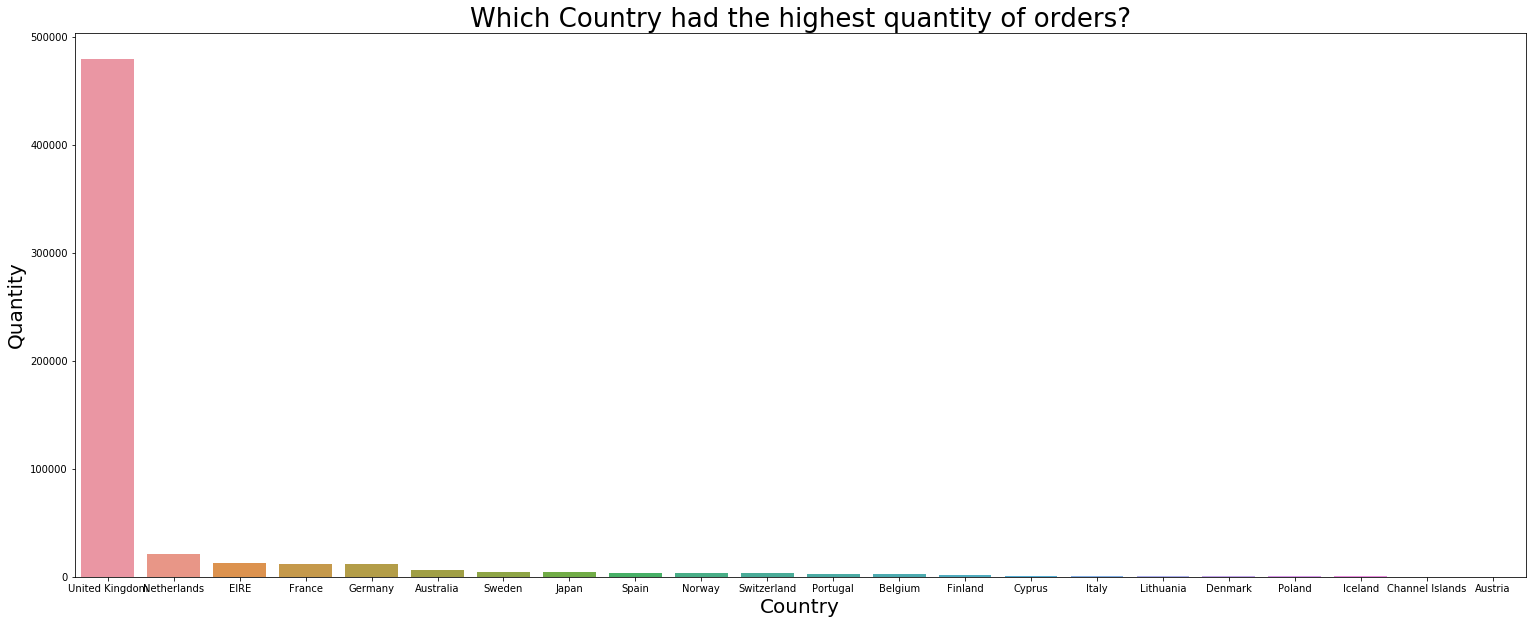

In [46]:
%matplotlib inline
plt.figure(figsize=(26, 10))
plot = sns.barplot(x='Country',y='Quantity', data=detailed)


plot.set_title('Which Country had the highest quantity of orders?',fontsize=26)
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('Quantity',fontsize=20)
plot

### Which Customer had the biggest spend? 



In [47]:
bestcustomer = df.groupby('CustomerID', as_index=False).agg(
    {"Total Cost": "sum", "Quantity":"sum"}).sort_values('Total Cost', ascending=False)
bestcustomer.head(10)

,CustomerID,Total Cost,Quantity
0,12346.0,77183.60,74215
1110,18102.0,27834.61,6695
422,14646.0,27008.26,21284
638,15749.0,22998.40,9014
504,15061.0,22107.61,10801
964,17450.0,20649.04,6840
330,14156.0,17096.92,7746
694,16029.0,14820.15,8689
477,14911.0,11218.36,5025
972,17511.0,10573.22,8340


### What day/month had the biggest sales?

In [53]:
bestmonth = df.groupby('Day', as_index=False).agg(
    { "Total Cost": "sum", "Quantity":"sum"}).sort_values('Day', ascending=True)
bestmonth.head(10)

,Day,Total Cost,Quantity
0,2010-12-01,46376.49,24215
1,2010-12-02,47316.53,31142
2,2010-12-03,23921.71,11839
3,2010-12-05,31771.60,16449
4,2010-12-06,31215.64,16291
5,2010-12-07,53795.31,19444
6,2010-12-08,39248.82,21573
7,2010-12-09,38231.90,17415
8,2010-12-10,33650.28,16051
9,2010-12-12,17305.77,10599


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

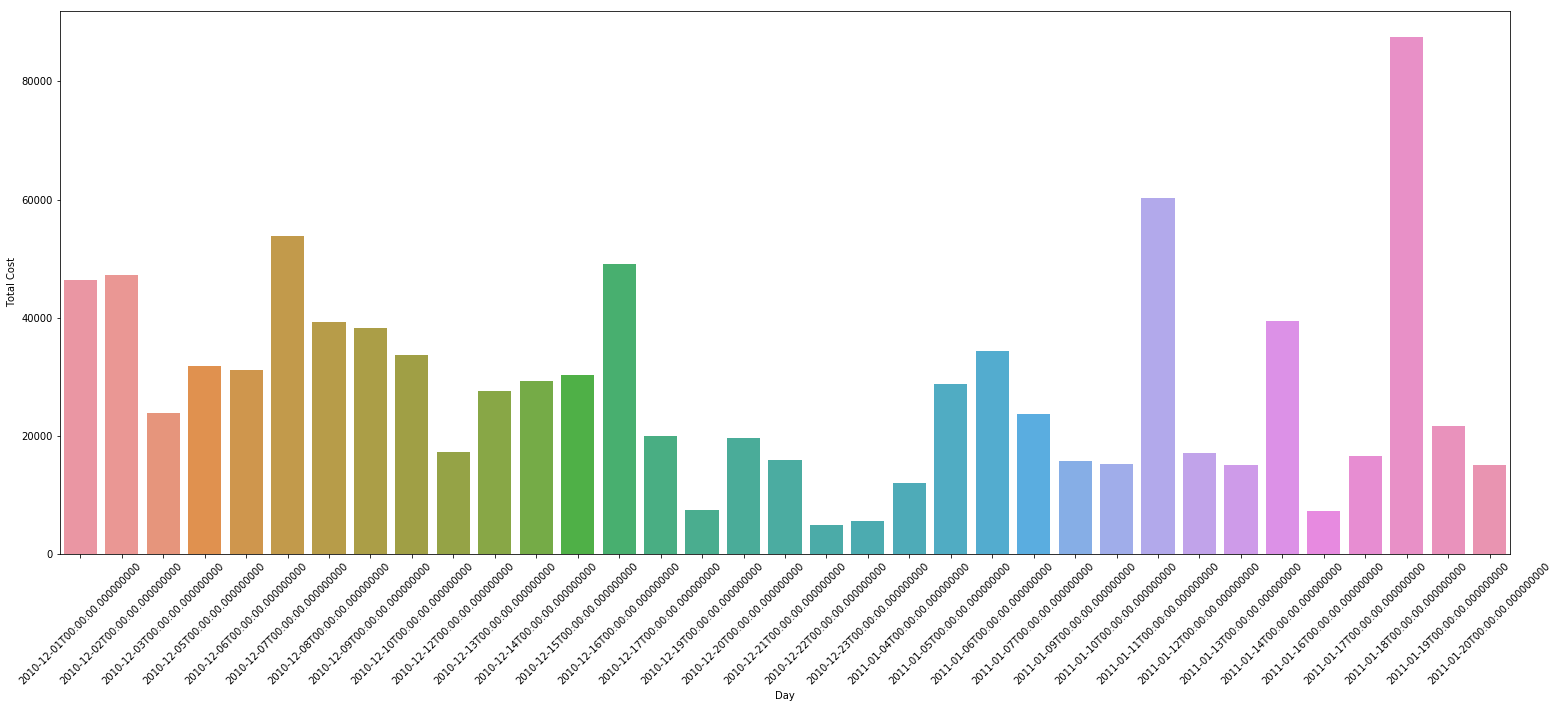

In [54]:
%matplotlib inline
plt.figure(figsize=(26, 10))

plot = sns.barplot(x='Day',y='Total Cost', data=bestmonth)
plt.xticks(rotation=45)

References:
    
    
https://realpython.com/python-data-cleaning-numpy-pandas/

https://www.oreilly.com/learning/handling-missing-data

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://bigdata-madesimple.com/step-by-step-approach-to-perform-data-analysis-using-python/

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/



